In [123]:
import pandas as pd
import numpy as np

In [124]:
data = pd.read_csv('C:\\Users\\akshay gera\\Jupyter Data\\BAN 200 Text Mining\\Group Project\\Drug_Review.csv')

In [125]:
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [126]:
#Removing Missings values from commentsReview column to avoid errors in further functions
data = data[data['commentsReview'].notnull()]

Lowercasing and Punctuation Removal

In [127]:
#Lowercasing 'Reviews' Column
data['commentsReview'] = data['commentsReview'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","i hate this birth control, i would not suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,i took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",i was given prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,see above


In [128]:
#Removing Punctuations from the text
data['commentsReview'] = data['commentsReview'].str.replace('[^\w\s]','')
data['benefitsReview	'] = data['benefitsReview'].str.replace('[^\w\s]','')
data['sideEffectsReview'] = data['sideEffectsReview'].str.replace('[^\w\s]','')

<ipython-input-128-b6c4980e711b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['commentsReview'] = data['commentsReview'].str.replace('[^\w\s]','')
<ipython-input-128-b6c4980e711b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['benefitsReview	'] = data['benefitsReview'].str.replace('[^\w\s]','')
<ipython-input-128-b6c4980e711b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sideEffectsReview'] = data['sideEffectsReview'].str.replace('[^\w\s]','')


In [129]:
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benefitsReview\t
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence rena...,monitor blood pressure weight and asses for r...,slowed the progression of left ventricular dys...
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,Heavy Cycle Cramps Hot Flashes Fatigue Long La...,i hate this birth control i would not suggest ...,Although this type of birth control has more c...
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal,i took 2 pills at the onset of my menstrual cr...,I was used to having cramps so badly that they...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,Constipation dry mouth and some mild dizziness...,i was given prilosec prescription at a dose of...,The acid reflux went away for a few months aft...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey Could not ...,see above,I think that the Lyrica was starting to help w...


In [130]:
#Counting number of words in commentsReview column
data['word_count'] = data['commentsReview'].apply(lambda x: len(str(x).split(" ")))
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benefitsReview\t,word_count
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence rena...,monitor blood pressure weight and asses for r...,slowed the progression of left ventricular dys...,11
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,Heavy Cycle Cramps Hot Flashes Fatigue Long La...,i hate this birth control i would not suggest ...,Although this type of birth control has more c...,12
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal,i took 2 pills at the onset of my menstrual cr...,I was used to having cramps so badly that they...,76
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,Constipation dry mouth and some mild dizziness...,i was given prilosec prescription at a dose of...,The acid reflux went away for a few months aft...,27
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey Could not ...,see above,I think that the Lyrica was starting to help w...,2


Removing Stopwords

In [131]:

from nltk.corpus import stopwords
stop = stopwords.words('english')


In [132]:
data['commentsReview'] = data['commentsReview'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['commentsReview'].head()

0    monitor blood pressure weight asses resolution...
1              hate birth control would suggest anyone
2    took 2 pills onset menstrual cramps every 812 ...
3    given prilosec prescription dose 45mg per day ...
4                                                  see
Name: commentsReview, dtype: object

In [133]:
#Checking word count after removing of stop words
data['word_count'] = data['commentsReview'].apply(lambda x: len(str(x).split(" ")))
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benefitsReview\t,word_count
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence rena...,monitor blood pressure weight asses resolution...,slowed the progression of left ventricular dys...,7
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,Heavy Cycle Cramps Hot Flashes Fatigue Long La...,hate birth control would suggest anyone,Although this type of birth control has more c...,6
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal,took 2 pills onset menstrual cramps every 812 ...,I was used to having cramps so badly that they...,43
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,Constipation dry mouth and some mild dizziness...,given prilosec prescription dose 45mg per day ...,The acid reflux went away for a few months aft...,16
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey Could not ...,see,I think that the Lyrica was starting to help w...,1


Tokenization

In [134]:
from textblob import TextBlob


In [135]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\akshay
[nltk_data]     gera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
#Tokenizing bag of words of comments review column
TextBlob(' '.join(data['commentsReview'])).words

WordList(['monitor', 'blood', 'pressure', 'weight', 'asses', 'resolution', 'fluid', 'hate', 'birth', 'control', 'would', 'suggest', 'anyone', 'took', '2', 'pills', 'onset', 'menstrual', 'cramps', 'every', '812', 'hours', 'took', '1', 'pill', 'needed', '34', 'days', 'cramps', 'cramps', 'bad', 'make', 'sure', 'take', 'every', '8', 'hours', 'dot', 'medication', 'stops', 'working', 'suddenly', 'unfortunately', 'takes', 'hour', 'hour', 'half', 'kick', 'back', 'cramps', 'moderate', 'taking', 'every', '12', 'hours', 'okay', 'given', 'prilosec', 'prescription', 'dose', '45mg', 'per', 'day', 'medication', 'taken', 'every', 'morning', 'eating', 'treatment', 'duration', '6', 'months', 'see', 'one', 'pill', 'daily', 'began', 'taking', '20mg', 'vyvanse', 'three', 'months', 'surprised', 'find', 'small', 'dose', 'affected', 'mood', 'effectively', 'came', 'school', 'work', 'though', 'found', 'needed', '30mg', 'increase', 'level', 'focus', 'month', 'since', 'experienced', 'decreased', 'appetite', 'mont

In [137]:
#Checking frequency of 20 most common words
most_freq = pd.Series(' '.join(data['commentsReview']).split()).value_counts()[:20]
most_freq

day           1169
take          1129
one            704
taking         697
mg             607
drug           548
took           544
medication     498
treatment      492
would          477
effects        475
side           463
days           458
daily          450
doctor         432
pain           427
prescribed     427
time           426
years          420
pill           419
dtype: int64

In [138]:
#Removing these common words as they will not be much useful for analysis

data['commentsReview'] = data['commentsReview'].apply(lambda x: " ".join(x for x in x.split() if x not in most_freq))
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benefitsReview\t,word_count
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence rena...,monitor blood pressure weight asses resolution...,slowed the progression of left ventricular dys...,7
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,Heavy Cycle Cramps Hot Flashes Fatigue Long La...,hate birth control suggest anyone,Although this type of birth control has more c...,6
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal,2 pills onset menstrual cramps every 812 hours...,I was used to having cramps so badly that they...,43
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,Constipation dry mouth and some mild dizziness...,given prilosec prescription dose 45mg per take...,The acid reflux went away for a few months aft...,16
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey Could not ...,see,I think that the Lyrica was starting to help w...,1


In [139]:
pd.Series(' '.join(data['commentsReview']).split()).value_counts()[-10000:]

every        415
2            391
started      380
months       377
dose         365
            ... 
irrigated      1
mediaxal       1
wuse           1
ailment        1
aarp           1
Length: 9493, dtype: int64

Wordcloud of All the Rows (With Stopwords)


In [140]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

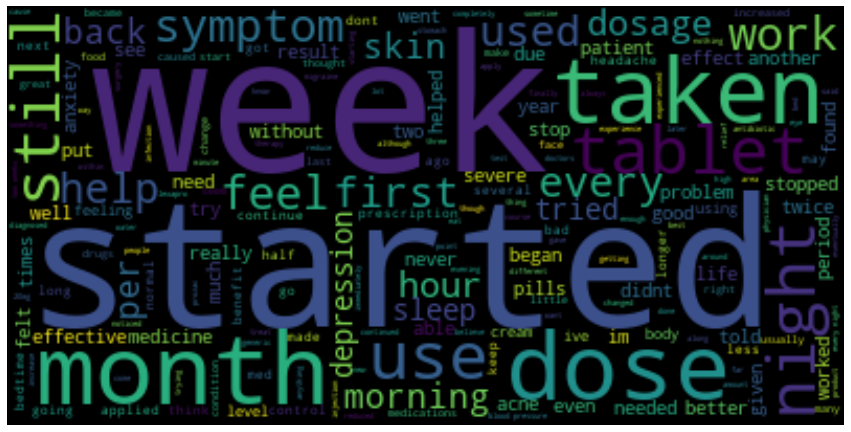

In [141]:
text = data

wordcloud = WordCloud().generate(' '.join(text['commentsReview']))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [142]:
#Creating a column Polarity which has the polarit measurement of the comments
data['polarity'] = data['commentsReview'].map(lambda text: TextBlob(text).sentiment.polarity)

In [143]:
data

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benefitsReview\t,word_count,polarity
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence rena...,monitor blood pressure weight asses resolution...,slowed the progression of left ventricular dys...,7,0.000000
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,Heavy Cycle Cramps Hot Flashes Fatigue Long La...,hate birth control suggest anyone,Although this type of birth control has more c...,6,-0.800000
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal,2 pills onset menstrual cramps every 812 hours...,I was used to having cramps so badly that they...,43,-0.052381
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,Constipation dry mouth and some mild dizziness...,given prilosec prescription dose 45mg per take...,The acid reflux went away for a few months aft...,16,0.000000
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey Could not ...,see,I think that the Lyrica was starting to help w...,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...",Restless legs at night insomnia headache somet...,adderall child made miserable never wanted con...,Increased focus attention productivity Better ...,57,0.261111
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,Weight gain extreme tiredness during the day i...,zoloft 2 total extremely sensitive started dos...,Emotions were somewhat blunted Less moodiness,194,-0.043226
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on ...,,,1,0.000000
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,Dizziness fatigue nausea,started 2 doses 300 worked 4 doses per six mon...,Controlled complex partial seizures,31,-0.050000


In [144]:
#Randomly checking 5 super negative reviews to cross check with the polarity score
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = data.loc[data.polarity < -0.5, ['commentsReview']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

horrible people thought made denied could make anyone sick continuously put
hate birth control suggest anyone
told miserable got called said dont know alergic cant wont still almost two go away
see label use recurrent cold infections
week felt like like crazy person felt depression anxiety takin gover personality neutralized feelings


In [145]:
#Visualizing number of reviews for each drug
data.urlDrugName.value_counts(0).to_frame().style.bar()

,urlDrugName
lexapro,63
prozac,46
zoloft,45
retin-a,45
paxil,38
synthroid,38
propecia,38
cymbalta,33
effexor,33
wellbutrin,32


In [146]:

import seaborn as sns

<AxesSubplot:xlabel='sideEffects', ylabel='polarity'>

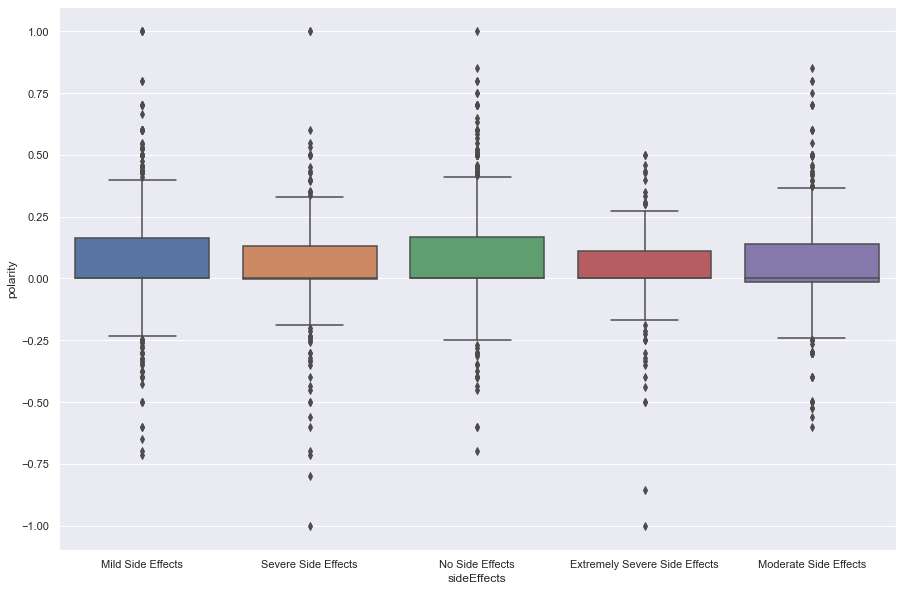

In [147]:
#Comparison of distrbution of polarity of comments categorized by the drug's side effects
sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(x=data['sideEffects'],y=data['polarity'])

Conclusion: Polarity of comments is distributed evenly accross all the drug side effects categories. While there are presence of outliers (extremely positive/negative comments) in all categories, but 75% of comments' polairty in all categories ranges from 0 to 0.2. We can say that 75% of the customers are either neutral or positive about the drug.

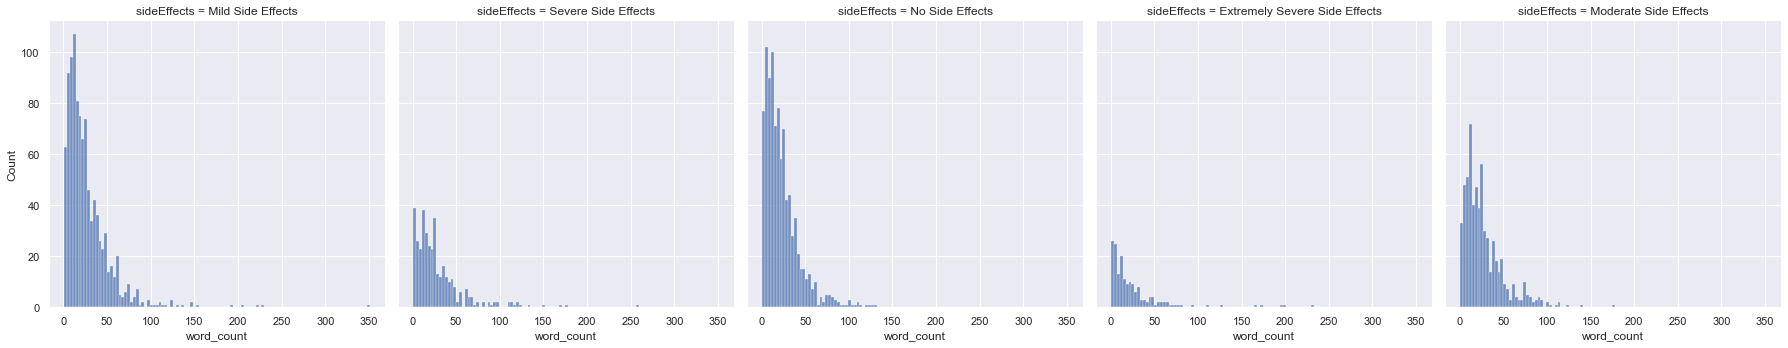

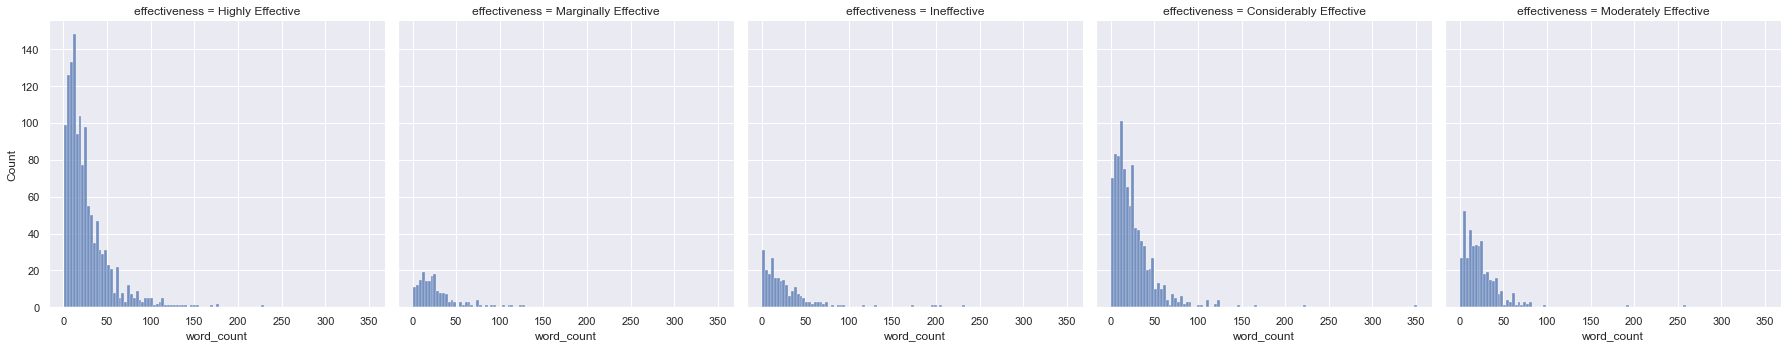

In [148]:
#Distribution of word count of the comments for different side effects and drug effectiveness
sns.displot(data['word_count'], x=data['word_count'] , col= data['sideEffects'])
sns.displot(data['word_count'], x=data['word_count'] , col= data['effectiveness'])

Conclusion: The distribution is right skewed, also called as Zipf Distribution. The word count of the comments for both categories (drug effectivness and drug's side effects) ranges from 0 to 50. Majority of customers express their reviews about the drug in 50 words and reviews with high word count occurs infrequently

<AxesSubplot:xlabel='word_count', ylabel='polarity'>

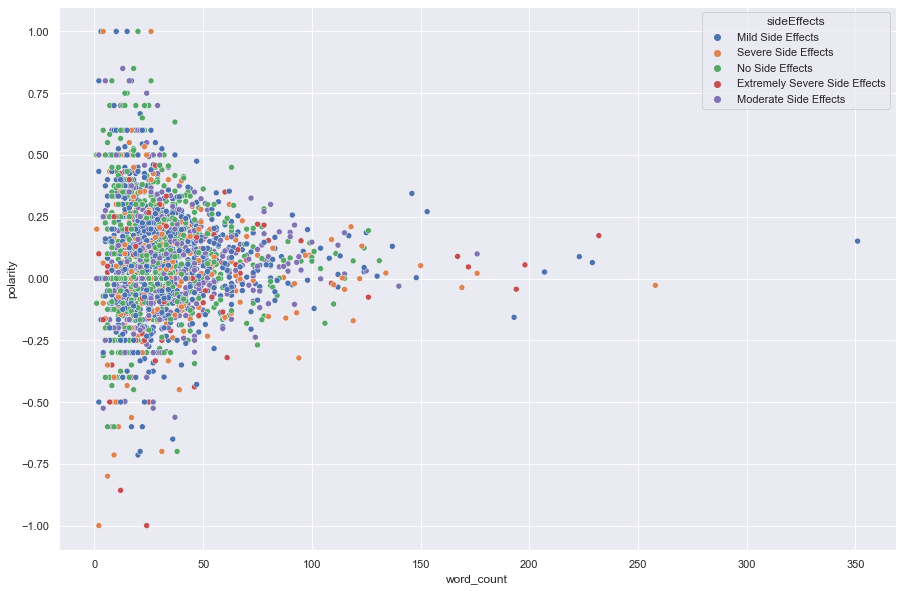

In [149]:
#Scatterplot of Word count and polarity shows fewer words are used for highly polarized comments
sns.set(rc = {'figure.figsize':(15,10)})
sns.scatterplot(x=data['word_count'],y=data['polarity'],hue=data['sideEffects'])


Conclusion: A scatter plot between word count and polarity of reviews visualizes a non-liner relationship between the two vairables, which means that polarity of reviews can come in any number of words (it could be higher polarity in fewer words and vice-versa)
The plot also enables us to visualize how the distribution of polarity looks like for reviews with word count greater than 50 words (the majority of reviewer word count) Reviews with word count over 50 are evenly distributed between -0.25 and 0.25 polarity.

In [150]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [152]:
data['condition'].head()

0    management of congestive heart failure
1                          birth prevention
2                          menstrual cramps
3                               acid reflux
4                              fibromyalgia
Name: condition, dtype: object